<a href="https://colab.research.google.com/github/levidasilvalima/RNA-PP1/blob/master/RedesNeuraisArtificiais_Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e importações

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
import math

# Conexão com o Drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# Importar CSV

- CSV baixado no dia 31-07-2020

In [41]:
df = pd.read_csv('/content/drive/My Drive/RNAFiles/Manaus.csv', sep=';', encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.



# Visão Geral dos Casos Confirmados


## Quantos atributos descrevem cada exemplo? Quais são eles?

In [42]:
print(df.columns.size, "Valores descrevem cada exemplo")
print("Sendo eles: \n", df.columns.values)

36 Valores descrevem cada exemplo
Sendo eles: 
 ['_idade' '_faixa etária' '_sexo' '_bairro' '_classificacao'
 '_comorb_renal' '_comorb_diabetes' '_comorb_imuno' '_comorb_cardio'
 '_conclusao' '_dt_notificacao' '_taxa' '_dt_evolucao' '_raca'
 '_dt_sintomas' '_criterio' '_tipo_teste' '_sintoma_garganta'
 '_sintoma_dispneia' '_sintoma_febre' '_sintoma_tosse' '_sintoma_outros'
 '_etnia' '_profiss_saude' '_srag' '_se_notificacao' '_distrito'
 '_bairro_mapa' '_comorb_respiratoria' '_comorb_cromossomica'
 '_comorb_hepatica' '_comorb_neurologica' '_comorb_hemato'
 '_comorb_obessidade' '_origem' '_evolução']


## Quantos casos confirmados há em Manaus, cumulativamente?

In [43]:
filter = df['_classificacao'] == "Confirmado"
df = df[filter] # Filtrar por casos confirmados
print("\nEm manaus há", len(df), "casos confirmados")


Em manaus há 36671 casos confirmados


## A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [44]:
ordered = df.sort_values(by='_dt_notificacao', ascending=True)
notNullFilter = pd.notnull(ordered["_dt_notificacao"]) 
ordered = ordered[notNullFilter]
initialDate = ordered.head(1)['_dt_notificacao'].values[0]
endDate = ordered.iloc[::-1].head(1)['_dt_notificacao'].values[0]
print("\nO periodo de tempo da base de dados vai de", initialDate, "a", endDate)


O periodo de tempo da base de dados vai de 01/04/2020 a 31/07/2020


## Limpeza do dataset

In [45]:
df = df.drop(columns=['_comorb_renal', 
                      '_comorb_diabetes', 
                      '_comorb_imuno', 
                      '_comorb_cardio', 
                      '_comorb_respiratoria', 
                      '_comorb_cromossomica', 
                      '_comorb_hepatica', 
                      '_comorb_neurologica', 
                      '_comorb_hemato', 
                      '_comorb_obessidade'])                         # Apagar atributos relativos a comorbidades
df = df.drop(columns=['_sintoma_garganta', 
                      '_sintoma_dispneia', 
                      '_sintoma_febre', 
                      '_sintoma_tosse', 
                      '_sintoma_outros'])                            # Apagar atributos relativos a sintomas
df = df.drop(columns=['_etnia', '_raca'])                            # Apagar atributos relativos a etnia
df = df.drop(columns=['_profiss_saude'])                             # Apagar atributos relativos a profissao
df = df.drop(columns=['_dt_evolucao',
                      '_dt_sintomas'])                               # Apagar atributos data exceto a de notificação
df = df.drop(columns=['_origem'])                                    # Apagar atributos relativos a origem
df = df.drop(columns=['_evolução',
                      '_criterio'])                                  # Apagar atributos desnecessarios
df = df.dropna(subset=df.columns.values)                             # Apagar linhas com atributos nulos


## Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [46]:
print("Apos a limpesa e organização do dataset, há", len(df), "exemplos descritos por", len(df.columns.values), "atributos cada\n")

Apos a limpesa e organização do dataset, há 661 exemplos descritos por 13 atributos cada



## Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [47]:
filterRecovered = df['_conclusao'] == "Recuperado" # Filtrar por casos recuperados
dfRecovered = df[filterRecovered]
percent = round((len(dfRecovered)/len(df))*100, 2)
print("A porcentagem de recuperados é de " + str(percent) + "% do todo\n")

A porcentagem de recuperados é de 98.03% do todo



### Gráfico para ilustrar curados em relação a não curados

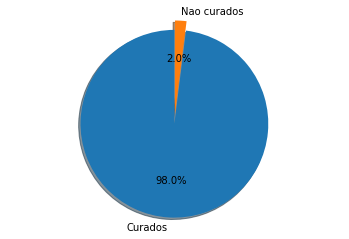

In [48]:
labels = 'Curados', 'Nao curados'
sizes = [percent, 100-percent] 
explode = (0.1, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  
ax1.axis('equal')  
plt.show()

## Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [49]:
filterWomen = df['_sexo'] == "F" # Filtrar por individuos mulher
qtdDfWomen = len(df[filterWomen])
filterMen = df['_sexo'] == "M" # Filtrar por individuos homem
qtdDfmen = len(df[filterMen])
print ("Casos acometidos mais a individuos do sexo",  "masculino" if qtdDfmen>qtdDfWomen else "feminino", "\n")

Casos acometidos mais a individuos do sexo masculino 



### Gráfico de Barras para visualização da quandidade de casos por sexo

In [50]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['Masculino', 'Feminino'],y=[qtdDfmen,qtdDfWomen ]))
fig.update_layout(autosize=False,width=500,height=500,)
fig.show()

## Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [51]:
filterCovid = df['_srag'] == "COVID-19" # Filtrar por casos de COVID-19
dfCovid = df[filterCovid]
mean = round(dfCovid["_idade"].mean(),0)
standardDeviation = round(dfCovid["_idade"].std(),2)
minAge = dfCovid["_idade"].min()
maxAge = dfCovid["_idade"].max()
print("\nA média e o desvio padrão da idade dos individuos que contrairam COVID-19 é respectivamente:", mean, "e", standardDeviation)
print("\nA Menor e a maior idade sao respectivamente", minAge, "e", maxAge, "anos")


A média e o desvio padrão da idade dos individuos que contrairam COVID-19 é respectivamente: 44.0 e 22.03

A Menor e a maior idade sao respectivamente 0.0 e 89.0 anos


## Qual o bairro com maior incidência de casos?

In [52]:
dfBairro = df.groupby(["_bairro"]).count()
maxOccurence = dfBairro.max()["_idade"]
filterMax = dfBairro["_idade"] == maxOccurence
bairro = dfBairro[filterMax].index[0]
print("\nO bairro com maior ocorrencia de casos é:", bairro, "com", maxOccurence, "casos")


O bairro com maior ocorrencia de casos é: COMPENSA com 41 casos


## Quais os três bairros com maior incidência de casos recuperados?

In [53]:
dfBairro = df[filterRecovered]

dfBairro = dfBairro.groupby(["_bairro", "_conclusao"]).count()
dfBairro = dfBairro.sort_values(by="_idade", ascending=False).index
first = dfBairro[0][0]
second = dfBairro[1][0]
third = dfBairro[2][0]
print("\nOs 3 bairros com maior incidencia de casos recuperados sao respectivamente:", first, "," , second, "e" , third)


Os 3 bairros com maior incidencia de casos recuperados sao respectivamente: COMPENSA , CIDADE NOVA e FLORES


## Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [55]:
dfTipoTeste = df.groupby(["_tipo_teste"]).count()
typeTest = df.groupby(["_tipo_teste"]).count().index
allTests = df.groupby(["_tipo_teste"]).count().sum()["_idade"]
types = []
quantity = []
percentage = []
for i in typeTest:
  types.append(i)
print("\nSão", len(types), "tipos de testes efetuados, sendo eles:", types)


São 4 tipos de testes efetuados, sendo eles: ['ECLIA IgG', 'RT-PCR', 'TESTE RÁPIDO - ANTICORPO', 'TESTE RÁPIDO - ANTÍGENO']


### Gráfico de Pizza para rerepsentar o percentual dos testes

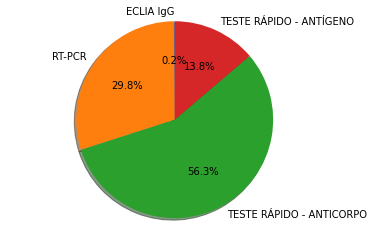

In [56]:
percentual = []
total = dfTipoTeste["_idade"].sum()
for i in range (len(dfTipoTeste["_idade"])):
  atual = dfTipoTeste["_idade"][i]
  percentual.append((atual/total)*100)
labels = types
sizes = percentual 
explode = (0,0,0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  
ax1.axis('equal')  
plt.show()

### Gráfico de barras para representação quantitativa dos tipos de teste

In [57]:
fig = go.Figure()
fig.add_trace(go.Bar(x=types,y=dfTipoTeste["_idade"]))
fig.update_layout(autosize=False,width=500,height=500,)
fig.show()

## Qual taxa de letalidade pode ser calculada a partir do conjunto de dados?

In [58]:
filterDeath = df['_conclusao'] != "Recuperado"
print("A taxa de letalidade é de %.2f%%"%(len(df[filterDeath]) * 100 / len(df[filterCovid])))

A taxa de letalidade é de 2.41%


## Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos?

In [97]:
dfByAge = df.groupby("_idade")

In [107]:
ages = dfByAge.groups.keys()
ages = list(ages)

In [103]:
values = dfByAge.count()['_sexo'].to_list()

In [108]:
from scipy.stats import pearsonr

In [115]:
corr, _ = pearsonr(ages, values)

In [123]:
print("O coeficiente de correla;'ao de Pearson é de", corr, "e ela é", "positiva" if corr >= 0 else "negativa. Sua intensidade é baixa")

O coeficiente de correla;'ao de Pearson é de 0.043620827827048445 e ela é positiva


### Gráfico mostrando a quantidade de casos por idade

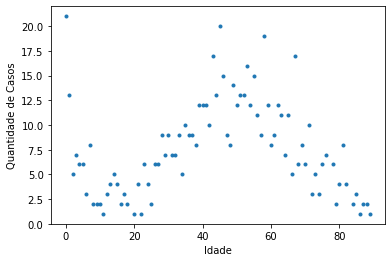

In [124]:
plt.ylabel('Quantidade de Casos')
plt.xlabel('Idade')
plt.plot(ages, values, '.')